# Spotify Data Analysis Project
## 1. Overview about the project 
##### "The Spotify Million Playlist Dataset Challenge consists of a dataset and evaluation to enable research in music recommendations. It is a continuation of the RecSys Challenge 2018, which ran from January to July 2018. 
##### **Goal:** Develop a system which takes a playlist, and predict the next songs on the playlist.
##### **Dataset:** https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge#dataset

## 2. Load The Dataset: Using Apache Sparks to Load All 1000 Files.
**Note**: Below are the steps to convert json data into a suitale structured format to analyze in Apache Sparks. 

In [174]:
!pip install pandas sqlalchemy pyspark 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 27.3 MB/s eta 0:00:00
Using legacy 'setup.py install' for pyspark, since package 'wheel' is not installed.
  Running setup.py install for pyspark ... done


In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SpotifyDataAnalysis").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/30 16:58:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
#drop any corrupt record (it occurs while sparks parsing the dataset there are some unexpected issues)
df = spark.read.option("mode", "DROPMALFORMED").json('/home/student/ttngo/SpotifyDataProject/data/mpd.slice.*.json')

#### Lets Try With A Subset of Dataset fiest (24 files)

In [8]:
import os
import json
directory = "/home/student/ttngo/SpotifyDataProject/data/"
# Get a list of all JSON files in the directory
files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.json')]
files_subset = files[:24]

In [64]:
data = []

# Loop through each file in the subset
for file in files_subset:
    # Open each file
    with open(file, 'r') as f:
        # Load the data from the file and append it to the list
        data.append(json.load(f))

In [65]:
import pandas as pd
df= pd.DataFrame(data)

In [66]:
df.shape

(24, 2)

In [67]:
import pandas as pd
# Initialize an empty list to store the playlists
playlists = []
# Loop through each file's data
for file_data in data:
    # Append each playlist to the list
    playlists.extend(file_data['playlists'])

# Convert the list of playlists to a DataFrame
dataframe = pd.DataFrame(playlists)


## 3. Perform EDA

In [68]:
dataframe.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,reggaeton,false,57000,1509321600,69,54,1,"[{'pos': 0, 'artist_name': 'Jory Boy', 'track_...",21,15467712,39,NaN
1,Drops of Jupiter,false,57001,1413417600,23,21,1,"[{'pos': 0, 'artist_name': 'Train', 'track_uri...",4,5410064,17,NaN
2,mix 2,false,57002,1508630400,111,86,1,"[{'pos': 0, 'artist_name': 'Day Wave', 'track_...",58,25278639,68,NaN
3,my jam,false,57003,1458345600,14,14,1,"[{'pos': 0, 'artist_name': 'One Direction', 't...",6,2850222,14,NaN
4,🇺🇸🇺🇸🇺🇸,false,57004,1501804800,25,24,4,"[{'pos': 0, 'artist_name': 'Nappy Roots', 'tra...",4,5471495,20,NaN


#### UNDERSTANDING THE STRUCTURE OF THE DATA

In [69]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           24000 non-null  object
 1   collaborative  24000 non-null  object
 2   pid            24000 non-null  int64 
 3   modified_at    24000 non-null  int64 
 4   num_tracks     24000 non-null  int64 
 5   num_albums     24000 non-null  int64 
 6   num_followers  24000 non-null  int64 
 7   tracks         24000 non-null  object
 8   num_edits      24000 non-null  int64 
 9   duration_ms    24000 non-null  int64 
 10  num_artists    24000 non-null  int64 
 11  description    447 non-null    object
dtypes: int64(8), object(4)
memory usage: 2.2+ MB


#### SUMMARIZE THE STATISTICS

In [33]:
dataframe.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.00000,2.400000e+04,24000.000000
mean,502666.166667,1.476655e+09,66.897417,49.988458,2.317708,17.77175,1.570038e+07,38.523333
std,256979.358098,3.624455e+07,53.972165,40.356282,51.619976,20.65925,1.303462e+07,30.818268
min,57000.000000,1.304208e+09,5.000000,2.000000,1.000000,2.00000,8.313910e+05,3.000000
25%,315749.750000,1.459642e+09,26.000000,20.000000,1.000000,5.00000,6.047151e+06,16.000000
50%,529499.500000,1.490227e+09,50.000000,38.000000,1.000000,10.00000,1.153985e+07,30.000000
75%,699249.250000,1.505434e+09,92.000000,68.000000,1.000000,23.00000,2.155395e+07,52.000000
max,946999.000000,1.509494e+09,250.000000,239.000000,6611.000000,184.00000,3.280194e+08,224.000000


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### VISUALIZE THE DATA

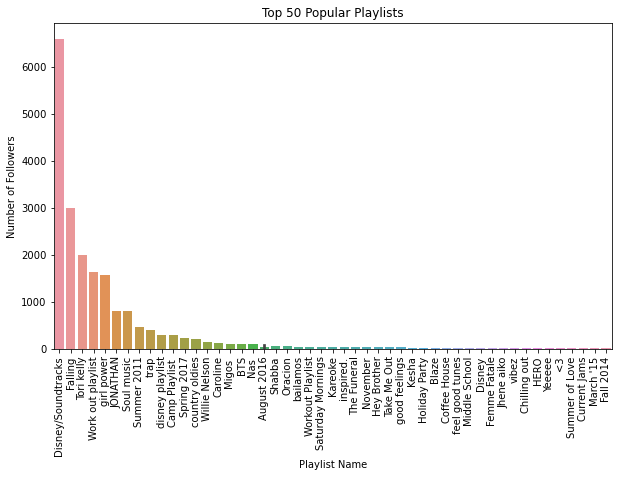

In [70]:
top_playlists = dataframe.nlargest(50, 'num_followers')

# Bar plot of the number of followers in top 50 playlists
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='num_followers', data=top_playlists)
plt.title('Top 50 Popular Playlists')
plt.xlabel('Playlist Name')
plt.ylabel('Number of Followers')
plt.xticks(rotation=90)
plt.show()


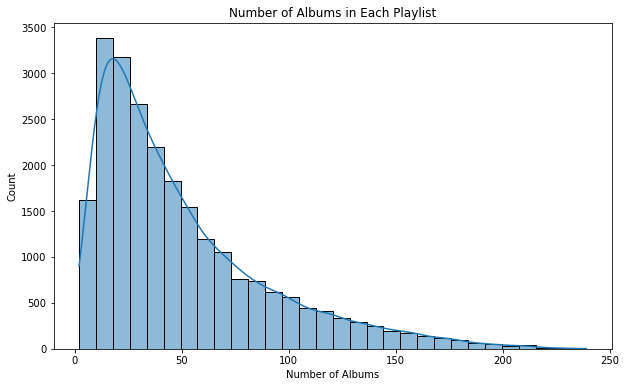

In [71]:
# 2. Histogram of the number of albums in each playlist
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['num_albums'], bins=30, kde=True)
plt.title('Number of Albums in Each Playlist')
plt.xlabel('Number of Albums')
plt.ylabel('Count')
plt.show()


## 4. Requesting More Information From Spotify API

In [44]:
client_id = 'c468fcc1bfb343a5972d0fae6cc23802'
client_secret ='2d996f020fe644f0b5e53fa257414c2e'

In [45]:
import requests
# Define the endpoint
url = 'https://accounts.spotify.com/api/token'
# Define the headers
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}
# Define the data
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

# Make the POST request
response = requests.post(url, headers=headers, data=data)

# Get the access token from the response
access_token = response.json()['access_token']

# Print the access token
print('Access token:', access_token)


Access token: BQCgCgkhy7KKywzYBC8tLIqPMiHJExef0F5z2lxPleYf62PVZt15NOvzC6OXNHOlvGLby2UgbDGQyK4eS1VJ_HcFFP4P9501Xv-0TN80N6CSjySh4SE


### Request Artists Information
**Note:** genres, popularity, followers

In [46]:
def fetch_artist_info(artist_id, access_token):
    url = f'https://api.spotify.com/v1/artists/{artist_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    return response.json()

In [47]:
# Fetch Kendrick Lamar information
artist_uri = 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'
artist_id = artist_uri.split(':')[-1]
artist_info = fetch_artist_info(artist_id, access_token)
print("Artist Info:", artist_info)

Artist Info: {'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'}, 'followers': {'href': None, 'total': 30314870}, 'genres': ['conscious hip hop', 'hip hop', 'rap', 'west coast rap'], 'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg', 'id': '2YZyLoL8N0Wb9xBt1NhZWg', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb437b9e2a82505b3d93ff1022', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174437b9e2a82505b3d93ff1022', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178437b9e2a82505b3d93ff1022', 'width': 160}], 'name': 'Kendrick Lamar', 'popularity': 92, 'type': 'artist', 'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'}


### Request Tracks Audio Features

In [48]:
# Fetch track audio features
def fetch_audio_features(track_id, access_token):
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    return response.json()

In [53]:
# Example information of the song: Not Like Us - Kendric Lamar
track_uri = 'spotify:track:6AI3ezQ4o3HUoP6Dhudph3'
track_id = track_uri.split(':')[-1]
audio_features = fetch_audio_features(track_id, access_token)
print("Audio Features:", audio_features)

Audio Features: {'danceability': 0.898, 'energy': 0.472, 'key': 1, 'loudness': -7.001, 'mode': 1, 'speechiness': 0.0776, 'acousticness': 0.0107, 'instrumentalness': 0, 'liveness': 0.141, 'valence': 0.214, 'tempo': 101.061, 'type': 'audio_features', 'id': '6AI3ezQ4o3HUoP6Dhudph3', 'uri': 'spotify:track:6AI3ezQ4o3HUoP6Dhudph3', 'track_href': 'https://api.spotify.com/v1/tracks/6AI3ezQ4o3HUoP6Dhudph3', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6AI3ezQ4o3HUoP6Dhudph3', 'duration_ms': 274192, 'time_signature': 4}


### Request Tracks Popularity

In [49]:
def fetch_track_popularity(track_id, access_token):
    url = f'https://api.spotify.com/v1/tracks/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    return response.json()['popularity']

In [54]:
track_popularity = fetch_track_popularity(track_id, access_token)
print("Track Popularity:", track_popularity)

Track Popularity: 95


### Request Albulm Information

In [50]:
def fetch_album_info(album_id, access_token):
    url = f'https://api.spotify.com/v1/albums/{album_id}'
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    response = requests.get(url, headers=headers)
    return response.json()

## 5. Create SQl Database 
**Note:** These database will store all the information about these table: Playlists, Artists, Tracks, Playlists_Tracks, Albums (including the additonal informations just requested)

In [56]:
import sqlite3

### 5.1 Playlist Tables

In [72]:
conn = sqlite3.connect('sql.db')
cur = conn.cursor()
#CREATE
create_playlist_table = '''
CREATE TABLE IF NOT EXISTS Playlists (
    pid INT PRIMARY KEY,
    name TEXT,
    collaborative TEXT,
    modified_at INT,
    num_tracks INT,
    num_albums INT,
    num_followers INT
    )
    '''
cur.execute(create_playlist_table)
conn.commit()
print("Table 'Playlists' created successfully.")

Table 'Playlists' created successfully.


In [88]:
conn = sqlite3.connect('sql.db')
cur = conn.cursor()
playlists_data = []
for element in data:
    playlists = element.get('playlists', [])
    
        # Iterate through each playlist in the playlists list
    for playlist in playlists:
        playlists_data.append((
            playlist['pid'],
            playlist['name'],
            playlist['collaborative'],
            playlist['modified_at'],
            playlist['num_tracks'],
            playlist['num_albums'],
            playlist['num_followers']
        ))             
    # Insert data into Playlists table
insert_query = '''
    INSERT OR IGNORE INTO Playlists (pid, name, collaborative, modified_at, num_tracks, num_albums, num_followers)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    '''
cur.executemany(insert_query, playlists_data)
conn.commit()
conn.close()

**Checking**: The total rows in this Playlists table should be 24k because there are 24 json files and each files contains 1000 playlists.

In [92]:
len(playlists_data)

24000

In [100]:
#CHECK THE SIZE OF TABLE (NUMBER OF ROWS)
conn = sqlite3.connect('sql.db')
# Create a cursor object using the connection
cur = conn.cursor()

cur.execute('SELECT COUNT(*) FROM Playlists')
row_count = cur.fetchone()[0]

# Print the number of rows
print(f'Number of rows in the Playlists table: {row_count}')

# Close the cursor and connection
cur.close()
conn.close()

Number of rows in the Playlists table: 24000


### 5.2: Tracks Tables

In [96]:
#CREATE TABLE
conn = sqlite3.connect('sql.db')
cur=conn.cursor()

#Create table
create_tracks_table = '''
CREATE TABLE IF NOT EXISTS Tracks (
        track_uri TEXT PRIMARY KEY,
        track_name TEXT,
        artist_name TEXT,
        album_name TEXT,
        duration_ms INT,
        popularity INT,
        danceability REAL,
        energy REAL,
        key INT,
        loudness REAL,
        mode INT,
        speechiness REAL,
        acousticness REAL,
        instrumentalness REAL,
        liveness REAL,
        valence REAL,
        tempo REAL,
        album_id TEXT,
        artist_id TEXT,
        FOREIGN KEY (album_id) REFERENCES Albums(album_id),
        FOREIGN KEY (artist_id) REFERENCES Artists(artist_id)
        )
    '''
cur.execute(create_tracks_table)
conn.commit()

In [98]:
conn = sqlite3.connect('sql.db')
cur = conn.cursor()
tracks_data = []
for element in data:
    playlists = element.get('playlists', [])
    
        # Iterate through each playlist in the playlists list
    for playlist in playlists:
        tracks = playlist.get('tracks', [])
        for track in tracks:
            tracks_data.append((
                    track['track_uri'],
                    track['track_name'],
                    track['artist_name'],
                    track['album_name'],
                    track['duration_ms'],
                    track.get('popularity', None),  # Adjust based on available data
                    track.get('danceability', None),  # Adjust based on available data
                    track.get('energy', None),  # Adjust based on available data
                    track.get('key', None),  # Adjust based on available data
                    track.get('loudness', None),  # Adjust based on available data
                    track.get('mode', None),  # Adjust based on available data
                    track.get('speechiness', None),  # Adjust based on available data
                    track.get('acousticness', None),  # Adjust based on available data
                    track.get('instrumentalness', None),  # Adjust based on available data
                    track.get('liveness', None),  # Adjust based on available data
                    track.get('valence', None),  # Adjust based on available data
                    track.get('tempo', None),  # Adjust based on available data
                    track['album_uri'].split(':')[2],  # Extract album ID from URI
                    track['artist_uri'].split(':')[2]  # Extract artist ID from URI
                ))
insert_tracks_query = '''
    INSERT OR IGNORE INTO Tracks (
        track_uri, track_name, artist_name, album_name, duration_ms,
        popularity, danceability, energy, key, loudness, mode, speechiness,
        acousticness, instrumentalness, liveness, valence, tempo,
        album_id, artist_id
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    '''
cur.executemany(insert_tracks_query, tracks_data)
conn.commit()
cur.close()
conn.close()      

In [99]:
len(tracks_data)

1605538

In [101]:
#CHECK THE SIZE OF TABLE (NUMBER OF ROWS)
conn = sqlite3.connect('sql.db')
# Create a cursor object using the connection
cur = conn.cursor()

cur.execute('SELECT COUNT(*) FROM Tracks')
row_count = cur.fetchone()[0]

# Print the number of rows
print(f'Number of rows in the Tracks table: {row_count}')

# Close the cursor and connection
cur.close()
conn.close()

Number of rows in the Tracks table: 301468


In [ ]:
**Notes:** The length of trac